In [1]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [6]:
train=pd.read_excel('train_data.xlsx')
test=pd.read_excel('test_data.xlsx')

In [7]:
def create_dataset(dataset,look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :-1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return np.asarray(dataX,dtype='float32'), np.asarray(dataY,dtype='float32')

In [8]:
windows=70
train=np.array(train)
test=np.array(test)
train_x,train_y = create_dataset(train,windows)
test_x,test_y = create_dataset(test,windows)
train_y=train_y.reshape(-1,1)
test_y=test_y.reshape(-1,1)

In [23]:
#designing the model
model = Sequential()
model.add(LSTM(units=50, input_shape=(train_x.shape[1],train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=200, batch_size=10,verbose=1)

Epoch 1/200
3049/3049 [==============================] - 43s 14ms/sample - loss: 13.1824 - accuracy: 0.0000e+00
Epoch 2/200
3049/3049 [==============================] - 38s 13ms/sample - loss: 7.2344 - accuracy: 0.0000e+00
Epoch 3/200
3049/3049 [==============================] - 39s 13ms/sample - loss: 5.6970 - accuracy: 0.0000e+00
Epoch 4/200
1020/3049 [=========>....................] - ETA: 25s - loss: 4.7113 - accuracy: 0.0000e+00

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-3862b437a971>", line 12, in <module>
    hist = model.fit(train_x, train_y, epochs=200, batch_size=10,verbose=1)
  File "C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 873, in fit
    steps_name='steps_per_epoch')
  File "C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 352, in model_iteration
    batch_outs = f(ins_batch)
  File "C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 3217, in __call__
    outputs = self._graph_fn(*converted_inputs)
  File "C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\eager\function.py", line 558, in __call__
    return self._call_flat(args)
  File "C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\


KeyboardInterrupt



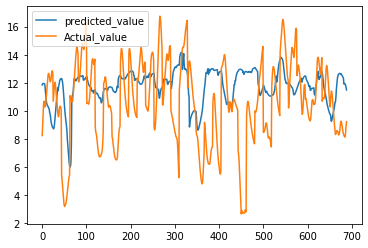

In [20]:
predY = model.predict(test_x)
plt.plot(predY,label="predicted_value")
plt.plot(test_y,label='Actual_value')
plt.legend()
plt.show()

In [16]:
for i in range(len(test_y)):
    print(predY[i], test_y[i])

[11.844952] [8.243078]
[11.920886] [8.891719]
[11.955537] [9.748104]
[11.957373] [10.422156]
[11.94413] [10.691629]
[11.920975] [10.644586]
[11.892817] [10.273632]
[11.496202] [10.333382]
[11.095259] [10.56051]
[10.798643] [10.879133]
[10.574909] [11.246491]
[10.444262] [11.641443]
[10.374592] [12.054792]
[10.3223915] [12.445622]
[10.259665] [12.665688]
[10.182214] [12.662375]
[10.123796] [12.512266]
[9.85536] [12.279624]
[9.807057] [12.081967]
[9.529256] [12.087126]
[9.278236] [12.280553]
[9.08968] [12.585257]
[8.953999] [12.821582]
[8.861934] [12.856412]
[8.800737] [12.728747]
[8.758082] [10.6936245]
[8.720894] [11.120311]
[8.829405] [11.534703]
[9.099252] [11.897523]
[9.482955] [12.037749]
[9.896717] [11.881819]
[10.296594] [11.548785]
[10.684226] [11.139548]
[11.069678] [10.718016]
[11.305244] [10.32318]
[11.632018] [9.9762745]
[11.424599] [9.689605]
[11.694243] [9.582047]
[11.857118] [9.798833]
[12.059955] [10.127412]
[12.18623] [10.307329]
[12.256915] [10.332108]
[12.289785] [10.

[11.870388] [12.226995]
[12.171394] [11.90293]
[12.475601] [11.578827]
[12.056619] [11.264623]
[12.0969] [10.96708]
[12.499925] [10.690535]
[12.82909] [10.43749]
[13.0979185] [10.209081]
[13.312399] [10.005435]
[13.474343] [9.825965]
[13.5886545] [9.669586]
[13.669223] [14.226313]
[13.836838] [14.652044]
[13.76965] [15.099106]
[13.745254] [15.535601]
[13.736321] [15.974103]
[13.6798] [16.35044]
[13.566254] [16.511938]
[13.385135] [16.43027]
[13.116653] [16.181067]
[12.792884] [15.821111]
[12.49744] [15.39272]
[12.213656] [14.927196]
[12.193231] [14.447422]
[11.992108] [13.964997]
[11.990207] [13.497919]
[11.933986] [13.051997]
[11.960103] [12.624696]
[11.956285] [12.301997]
[11.94717] [12.21231]
[11.945184] [10.206162]
[11.951083] [10.730253]
[11.915707] [11.465398]
[11.883212] [12.171704]
[11.817814] [12.776833]
[11.794836] [13.311351]
[11.7500725] [13.82293]
[11.70828] [14.294305]
[11.657228] [14.519526]
[11.591679] [14.444845]
[11.500422] [14.217132]
[11.252423] [13.94603]
[11.13814

In [24]:
%pip install hyperopt

Note: you may need to restart the kernel to use updated packages.
